<a href="https://colab.research.google.com/github/masterfloss/games/blob/main/gamification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

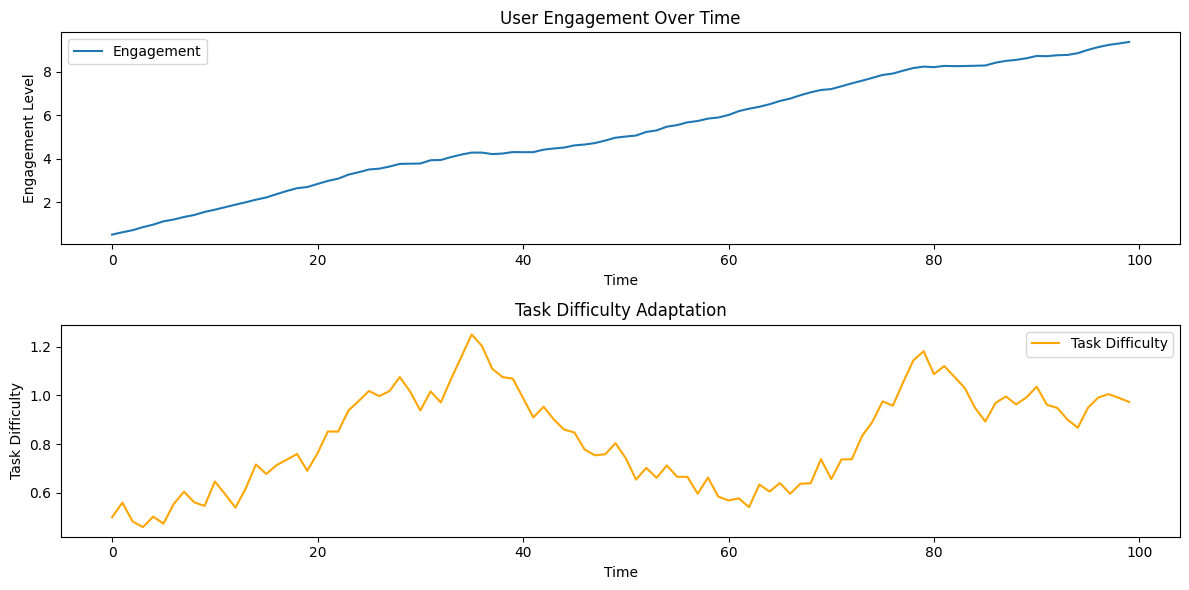

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class GamifiedEnvironment:
    def __init__(self, time_steps=100, alpha=0.1, beta=0.05, gamma=0.2, delta=0.9, w1=2.0, w2=1.0):
        self.time_steps = time_steps
        self.alpha = alpha  # Reward scaling factor
        self.beta = beta  # Disengagement scaling factor
        self.gamma = gamma  # Task adaptation rate
        self.delta = delta  # Discount factor for Q-learning
        self.w1 = w1  # Weight for long-term gains
        self.w2 = w2  # Weight for immediate costs

        # Initial states
        self.engagement = [0.5]
        self.task_difficulty = [0.5]
        self.user_performance = np.random.rand(self.time_steps)
        self.task_success_rate = 0.5
        self.reward_history = []

        # Q-learning parameters
        self.actions = [-0.1, 0, 0.1]  # Adjustments to task difficulty
        self.q_table = {0: {action: 0 for action in self.actions}}
        self.state = 0  # Initial state index

    def calculate_reward(self, action, long_term_gain, immediate_cost):
        """Calculate reward based on action, long-term gain, and immediate cost."""
        return self.w1 * long_term_gain - self.w2 * immediate_cost

    def update_engagement(self, reward, disengagement_rate):
        """Update user engagement based on reward and disengagement rate."""
        return self.engagement[-1] + self.alpha * reward - self.beta * disengagement_rate

    def adapt_task_difficulty(self, current_difficulty, user_perf, success_rate):
        """Adapt task difficulty based on user performance and success rate."""
        return current_difficulty + self.gamma * (user_perf - success_rate)

    def update_q_table(self, state, action, reward, next_state):
        """Update Q-table using Q-learning formula."""
        if next_state not in self.q_table:
            self.q_table[next_state] = {action: 0 for action in self.actions}
        max_future_q = max(self.q_table[next_state].values())
        current_q = self.q_table[state][action]
        self.q_table[state][action] = current_q + self.delta * (reward + max_future_q - current_q)

    def simulate(self):
        """Run the simulation for the specified number of time steps."""
        for t in range(1, self.time_steps):
            # Simulate disengagement rate
            disengagement_rate = np.random.rand()

            # Select an action (simple epsilon-greedy policy)
            if np.random.rand() < 0.1:  # Exploration
                action = np.random.choice(self.actions)
            else:  # Exploitation
                action = max(self.q_table[self.state], key=self.q_table[self.state].get)

            # Update task difficulty
            new_task_difficulty = self.adapt_task_difficulty(
                self.task_difficulty[-1], self.user_performance[t], self.task_success_rate
            )
            self.task_difficulty.append(new_task_difficulty)

            # Calculate reward
            long_term_gain = 1 - abs(new_task_difficulty - self.user_performance[t])
            immediate_cost = abs(action)
            reward = self.calculate_reward(action, long_term_gain, immediate_cost)
            self.reward_history.append(reward)

            # Update engagement
            new_engagement = self.update_engagement(reward, disengagement_rate)
            self.engagement.append(new_engagement)

            # Update Q-table
            next_state = self.state + 1
            self.update_q_table(self.state, action, reward, next_state)

            # Move to the next state
            self.state = next_state

    def plot_results(self):
        """Plot the results of the simulation."""
        plt.figure(figsize=(12, 6))

        # Engagement plot
        plt.subplot(2, 1, 1)
        plt.plot(range(self.time_steps), self.engagement, label="Engagement")
        plt.xlabel("Time")
        plt.ylabel("Engagement Level")
        plt.title("User Engagement Over Time")
        plt.legend()

        # Task difficulty plot
        plt.subplot(2, 1, 2)
        plt.plot(range(self.time_steps), self.task_difficulty, label="Task Difficulty", color="orange")
        plt.xlabel("Time")
        plt.ylabel("Task Difficulty")
        plt.title("Task Difficulty Adaptation")
        plt.legend()

        plt.tight_layout()
        plt.show()


# Create and run the simulation
if __name__ == "__main__":
    env = GamifiedEnvironment(time_steps=100)
    env.simulate()
    env.plot_results()